# Collation outputs


- Introduction
- In practice
    - Table: HTML
    - Table: JSON
    - Table: XML and XML/TEI
    - Graph: SVG
- Exercise
- What's next

---


## Introduction

In this tutorial we will be trying different outputs for our collation, meaning different graphical representations, formats and visualizations of the result.

The visualization of the collation result is an open discussion: several possibilities have been suggested and used and new ones are always being proposed. When the output of the collation is a printed format, such as a book, it is rare to see anything different from the traditional critical apparatus. Now that output formats are more frequently digital (or at least have a digital component), collation tools tend to offer more than one visualization option. This is the case for both Juxta and CollateX. The different visualizations are not incompatible; on the contrary, they can be complementary, highlighting different aspects of the result and suitable for different users or different stages of the workflow.

In the previous tutorials we used the alignment table and the graph. The alignment table, in use since the 1960's, is the equivalent of the matrix of bioinformatic for sequence alignment (for example, strings of DNA). In contrast, the graph is meant to represent the fluidity of the text and its variation. The idea of a graph-oriented model for expressing textual variance has been originally developed by Desmond Schmidt [(2008)](http://multiversiondocs.blogspot.it/2008/03/whats-multi-version-document.html). You can refer to [this video](https://vimeo.com/114242362), for a presentation on *Apparatus vs. Graph – an Interface as Scholarly Argument* by Tara Andrews and Joris van Zundert.
Other outputs, such as the histogram and the side-by-side visualization offered by Juxta, allow users to visualize the result of the comparison between two witnesses only. This reflects the way the algorithm is built and shows that the graphical representation is connected with the approach to collation that informs the software.

CollateX has two main ways to conceive of the collation result: as a **table** (with many different formatting options) and as a **graph**:
- table formats
    - plain text table (no need to specify the output)
    - HTML table (output='**html**')
    - HTML vertical table with colors (output='**html2**')
    - JSON (output='**json**')
    - XML (output='**xml**')
    - XML/TEI (output='**tei**')
- graph format
    - SVG (output='**svg**')

## In practice

Even though we have already encountered some of these outputs, it is worth going through them one more time focussing on part of the code that needs to change to produce the different formats. 

### Table: plain text

In this tutorial we will use some simple texts already used in the previous tutorial: the *fox and dog* example.

Let's start with the most simple output, for which we don't need to specify any output format (note that you can name the variable containing the output anything you like, but in this tutorial we call it *alignment_table*, *table* or *graph*)

In the code cell below the lines starting with a hash (#) are comments and are not executed. They are there in this instance to help you remember what the different parts of the code do. You do not need to use them in your notebook (although sometimes it is helpful to add comments to your code so you remember what things do).

In [2]:
#import the collatex library
from collatex import *
#create an instance of the collateX engine
collation = Collation()
#add witnesses to the collateX instance
collation.add_plain_witness( "A", "The quick brown fox jumped over the lazy dog.")
collation.add_plain_witness( "B", "The brown fox jumped over the dog." )
collation.add_plain_witness( "C", "The bad fox jumped over the lazy dog." )
#collate the witnesses and store the result in a vaiable called 'table'
#as we have not specified an output this will be sored in plain text
table = collate(collation)
#print the collation result
print(table)

+---+-----+-------+-------+---------------------+------+------+
| A | The | quick | brown | fox jumped over the | lazy | dog. |
| B | The | -     | brown | fox jumped over the | -    | dog. |
| C | The | bad   | -     | fox jumped over the | lazy | dog. |
+---+-----+-------+-------+---------------------+------+------+


### Table: HTML

Now let's try a different output. This time we still want a table format but instead of it being in plain text we would like it exported in HTML (the markup language used for web pages), and we would like it to be displayed vertically with nice colors to highlight the comparison. To achieve this all you need to do is add the keyword *output* to the *collate* command and give it that value *html2*.

In [3]:
table = collate(collation, output='html2')

Before moving to the other outputs, try to produce the simple HTML output by changing the code above. The value required in the *output* keyword should be *html*.

### Table: JSON

The same alignment table can be exported in a variety of formats, as we have seen, including JSON (Javascript Object Notation), a format widely used for storing and interchanging data nowadays. In order to produce JSON as output, we need to specify *json* as the output format.

In [4]:
table = collate(collation, output='json')
print(table)

{"table": [[[{"n": "The", "t": "The "}], [{"n": "quick", "t": "quick "}], [{"n": "brown", "t": "brown "}], [{"n": "fox", "t": "fox "}, {"n": "jumped", "t": "jumped "}, {"n": "over", "t": "over "}, {"n": "the", "t": "the "}], [{"n": "lazy", "t": "lazy "}], [{"n": "dog", "t": "dog"}, {"n": ".", "t": "."}]], [[{"n": "The", "t": "The "}], null, [{"n": "brown", "t": "brown "}], [{"n": "fox", "t": "fox "}, {"n": "jumped", "t": "jumped "}, {"n": "over", "t": "over "}, {"n": "the", "t": "the "}], null, [{"n": "dog", "t": "dog"}, {"n": ".", "t": "."}]], [[{"n": "The", "t": "The "}], [{"n": "bad", "t": "bad "}], null, [{"n": "fox", "t": "fox "}, {"n": "jumped", "t": "jumped "}, {"n": "over", "t": "over "}, {"n": "the", "t": "the "}], [{"n": "lazy", "t": "lazy "}], [{"n": "dog", "t": "dog"}, {"n": ".", "t": "."}]]], "witnesses": ["A", "B", "C"]}


### Table: XML and XML/TEI

We can use the same procedure in order to export the table in XML or XML/TEI (the latter produces a condensed version of the table only listing witnesses at points of divergence - also called a negative apparatus). To do this you just specify a different output format. Let's start with the XML output (that you can later post-process using XSLT or other tools).

In [5]:
table = collate(collation, output='xml')
print(table)

<root><app><rdg wit="#A">The </rdg><rdg wit="#B">The </rdg><rdg wit="#C">The </rdg></app><app><rdg wit="#A">quick </rdg><rdg wit="#C">bad </rdg></app><app><rdg wit="#A">brown </rdg><rdg wit="#B">brown </rdg></app><app><rdg wit="#A">fox jumped over the </rdg><rdg wit="#B">fox jumped over the </rdg><rdg wit="#C">fox jumped over the </rdg></app><app><rdg wit="#A">lazy </rdg><rdg wit="#C">lazy </rdg></app><app><rdg wit="#A">dog.</rdg><rdg wit="#B">dog.</rdg><rdg wit="#C">dog.</rdg></app></root>


And, finally, you can test the XML/TEI output that produces XML following the TEI parallel segmentation encoding guidelines.

In [6]:
table = collate(collation, output='tei')
print(table)

<p>The <app><rdg wit="#A">quick </rdg><rdg wit="#C">bad </rdg></app><app><rdg wit="#A #B">brown </rdg></app>fox jumped over the <app><rdg wit="#A #C">lazy </rdg></app>dog.</p>



### Graph: SVG

And now for something different: try with the graph, exported in the SVG format

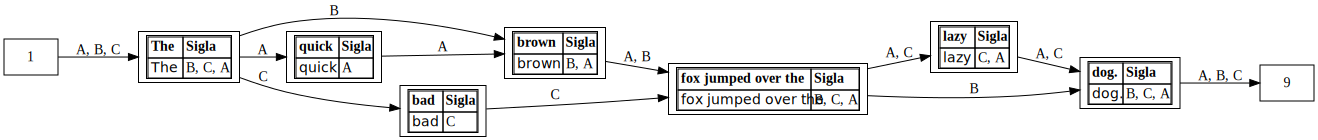

In [7]:
graph = collate(collation, output='svg')

NOTE: If you are working in an IDE such as PyCharm, you may get an error message when generating the graph. First make sure that you have GraphViz and its bindings installed correctly. If the error message regards the syntax,  however, rest assured that you have done nothing wrong: the error is related to the SVG generated code. We are aware of the problem. If you wish to generate a variant graph of your collation: Jupyter notebooks ignores the syntax error so you might consider working in Jupyter notebooks for the moment.

## Exercise

In this tutorial we have used the *fox and dog* example. Now try to produce a JSON or TEI output of the first paragraph of Darwin's *On the origin of species*, that we have already used in the [first tutorial](http://nbviewer.jupyter.org/github/DiXiT-eu/collatex-tutorial/blob/master/unit5/1_collate-plain-text.ipynb). You can find the data in *fixtures/Darwin/txt* (only the first paragraph: *xxxx\_par1*).

Alternatively, or if you still have time, you can use the data in *fixtures/Woolf/Lighthouse-1* and produce new outputs.

## What's next

In the next tutorial, [Collate outside the notebook](http://nbviewer.jupyter.org/github/DiXiT-eu/collatex-tutorial/blob/master/unit5/4_collate-outside-the-notebook.ipynb), we will leave the notebook and learn how to create and run Python scripts using PyCharm and the terminal, and how to save the collation results in a new file.
